# Introduction

The following notebook presents both the definition of the models to be used (including preprocessing and hyperparameter tuning) and their respective evaluation.

# Import Libraries and Other Code

In [44]:
# Relevant Libraries

import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

import seaborn as sns
import matplotlib.pyplot as plt

# Load and Split Dataset

In [7]:
# Loading dataset

PlantGrowth_Dataset = pd.read_csv("../ExploratoryDataAnalysis/plant_growth_data.csv")

# Splitting variables into Numerical and Categorical Features and Target

labels_variables = PlantGrowth_Dataset.columns

Features = labels_variables[:-1]
Target = labels_variables[-1]

NumericalFeatures , CategoricalFeatures = [] , []
for feature in Features:
    if PlantGrowth_Dataset[feature].dtype == 'object':
        CategoricalFeatures.append(feature)
    else:
        NumericalFeatures.append(feature)

In [ ]:
# Splitting dataset

RANDOM_STATE = 8013

X_train , X_test , y_train , y_test = train_test_split(PlantGrowth_Dataset[Features],PlantGrowth_Dataset[Target],test_size=0.25,random_state=RANDOM_STATE)

# Preprocessing

In [ ]:
# Importing additional functions

from sklearn.preprocessing import OrdinalEncoder , StandardScaler

In [ ]:
# Definition of Preprocessing

Preprocessing = ColumnTransformer(
    [
        ('CategoricalFeatures',OrdinalEncoder(),CategoricalFeatures),
        ('NumericalFeatures',StandardScaler(),NumericalFeatures),
    ]
)

Preprocessing

ColumnTransformer(transformers=[('CategoricalFeatures', OrdinalEncoder(),
                                 ['Soil_Type', 'Water_Frequency',
                                  'Fertilizer_Type']),
                                ('NumericalFeatures', StandardScaler(),
                                 ['Sunlight_Hours', 'Temperature',
                                  'Humidity'])])

# Model Architectures

In [14]:
# Importing models

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Model Architectures 

Model_Architectures = ['Forest']

## Random Forest

In [21]:
# Random Forest model

Model_Forest = Pipeline(
    [
        ('Preprocessing',Preprocessing),
        ('Classifier',RandomForestClassifier(random_state=RANDOM_STATE,n_jobs=4)),
    ]
)

Parameters_Forest = {
    'Classifier__n_estimators' : [25,50,75,100],
    'Classifier__criterion' : ['gini','entropy']
}

# Models Fine-Tunning

In [ ]:
# Global variables
Global_Variables = globals()

In [ ]:
# Fine-Tunning using Cross-Validation

for model_name in Model_Architectures:
    estimator_model = Global_Variables[f'Model_{model_name}']
    parameters_model = Global_Variables[f'Parameters_{model_name}']

    Global_Variables[f'Best_{model_name}'] = GridSearchCV(estimator_model,parameters_model,scoring='f1_macro',cv=6,n_jobs=4)
    Global_Variables[f'Best_{model_name}'].fit(X_train,y_train)

# Models Evaluation

In [45]:
# Evaluating models

Metrics = [accuracy_score,precision_score,recall_score,f1_score]
evaluation_results = {}

for model_name in Model_Architectures:
    y_predictions = Global_Variables[f'Best_{model_name}'].predict(X_test)
    evaluation_results[f'{model_name}'] = [metric(y_test,y_predictions) for metric in Metrics]

<Axes: >

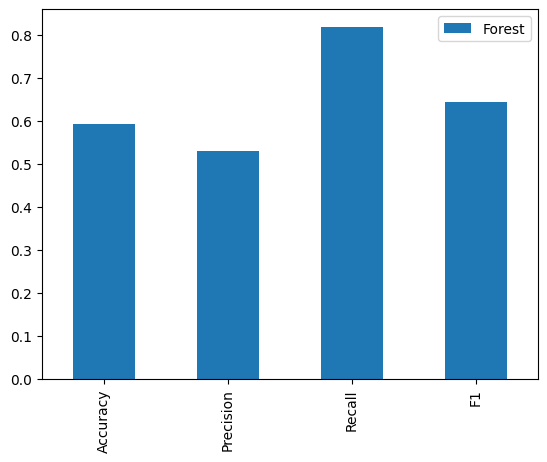

In [ ]:
# Plotting results by metric

EvaluationsResults = pd.DataFrame(evaluation_results)
EvaluationsResults.rename(index={0:'Accuracy',1:'Precision',2:'Recall',3:'F1'},inplace=True)

EvaluationsResults.plot(kind='bar')